In [7]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [8]:
off_hists = load('official.merged')
pri_hists = load('private.merged')

In [ ]:
off_hists.keys()

In [ ]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
if not os.path.exists('unstack'):
    os.makedirs('unstack')

for key in off_hists.keys():
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#e41a1c', '#377eb8', '#4daf4a']
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(off_hists[key], overlay="dataset", ax=ax, clear=False, stack=False,)
    plot.plot1d(pri_hists[key], overlay="dataset", ax=ax, clear=False, stack=False,)
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
    ax.set_ylim(.1, None)
    leg = ax.legend(ncol=2, loc='best')
    coffee = plt.text(0., 1., u"☕ ", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #plot_path = os.path.abspath('unstack')
    #plot_name = 'unstack'+key+'_'+R[str(j).split('_')[0]]+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))

In [ ]:
for key in off_hists.keys():
    print(off_hists[key])

In [9]:
### Scale histograms to 1

print('Official histos')
for key in off_hists.keys():
    yld = off_hists[key].integrate('dataset').sum(key).values(overflow='all')[()]
    print(key, yld)
    off_hists[key].scale(1./yld)

print('')
print('Private histos')
for key in pri_hists.keys():
    yld = pri_hists[key].integrate('dataset').sum(key).values(overflow='all')[()]
    print(key, yld)
    pri_hists[key].scale(1./yld)

Official histos
medpt 1199450.0
medmass 1199494.0
hsmass 1163751.0
j1pt 602132.0
metphi 602260.0
hseta 1157696.0
mindphimet 602260.0
met 596040.0
j1phi 602260.0
hspt 1163724.0
dmpt 1209543.0
njets 312554.0
dmmass 1209546.0
j1eta 601812.0
dmeta 1191290.0
medeta 1184088.0

Private histos
medpt 347246.0
medmass 347258.0
hsmass 337265.0
j1pt 174211.0
metphi 174254.0
hseta 335486.0
mindphimet 174254.0
met 172356.0
j1phi 174254.0
hspt 337261.0
dmpt 349758.0
njets 90243.0
dmmass 349758.0
j1eta 174127.0
dmeta 344483.0
medeta 343088.0


In [10]:
for key in off_hists.keys():
    print(off_hists[key])

<Hist (dataset,medpt) instance at 0x7f7b15069780>
<Hist (dataset,medmass) instance at 0x7f7b150695c0>
<Hist (dataset,hsmass) instance at 0x7f7b1506b438>
<Hist (dataset,j1pt) instance at 0x7f7b15073828>
<Hist (dataset,metphi) instance at 0x7f7b15073ba8>
<Hist (dataset,hseta) instance at 0x7f7b15078080>
<Hist (dataset,mindphimet) instance at 0x7f7b15078a90>
<Hist (dataset,met) instance at 0x7f7b1507b710>
<Hist (dataset,j1phi) instance at 0x7f7b1507bfd0>
<Hist (dataset,hspt) instance at 0x7f7b15002ef0>
<Hist (dataset,dmpt) instance at 0x7f7b15002e48>
<Hist (dataset,njets) instance at 0x7f7b15002fd0>
<Hist (dataset,dmmass) instance at 0x7f7b15001e80>
<Hist (dataset,j1eta) instance at 0x7f7b15001470>
<Hist (dataset,dmeta) instance at 0x7f7b15001978>
<Hist (dataset,medeta) instance at 0x7f7b150016d8>


/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/home/jongho/Physics/LPC-DM/coffea/lib/python3.6/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = np.abs(poisson_interval(rsumw, sumw2_num / sumw_d

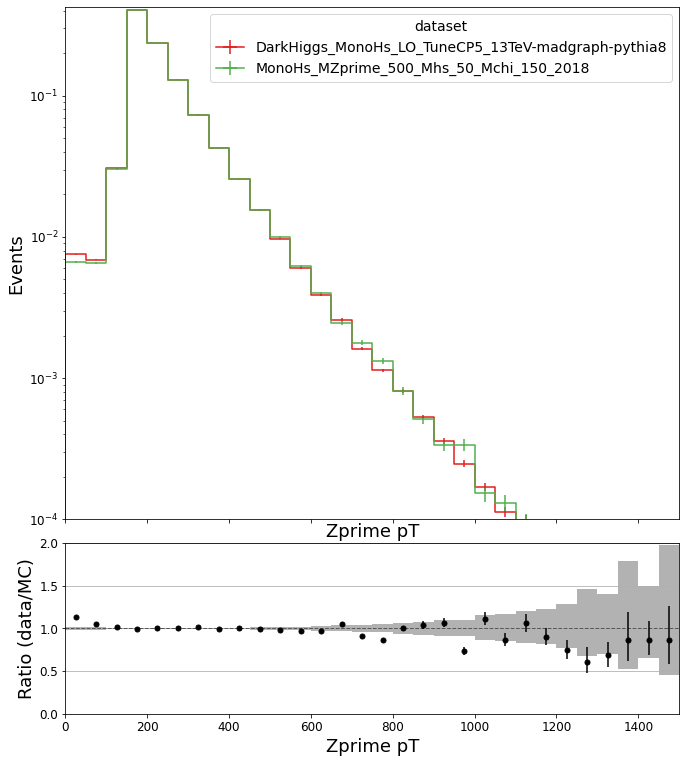

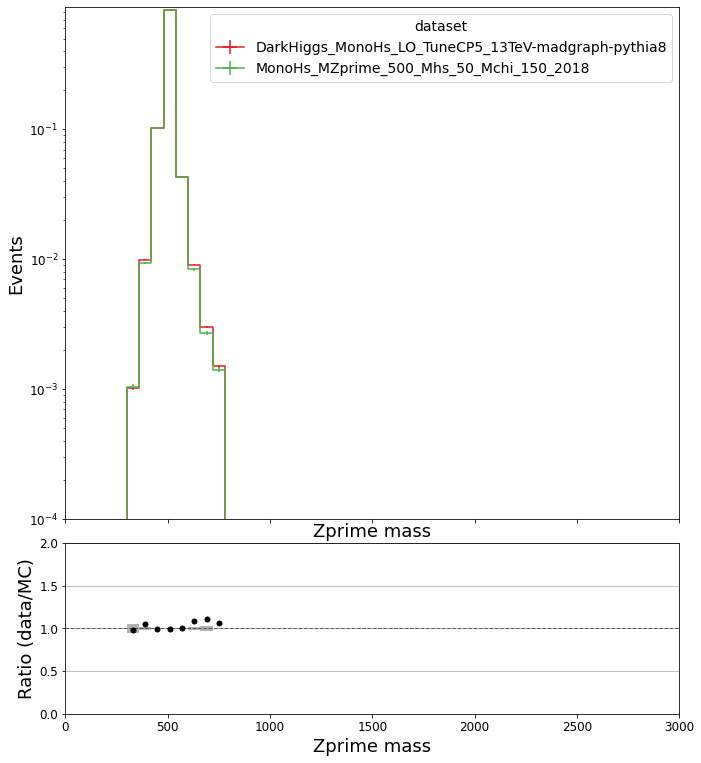

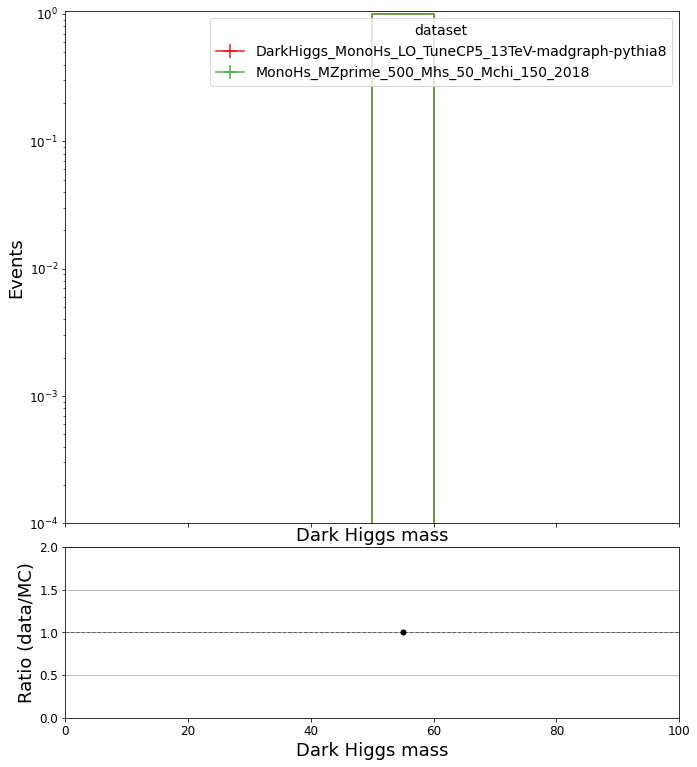

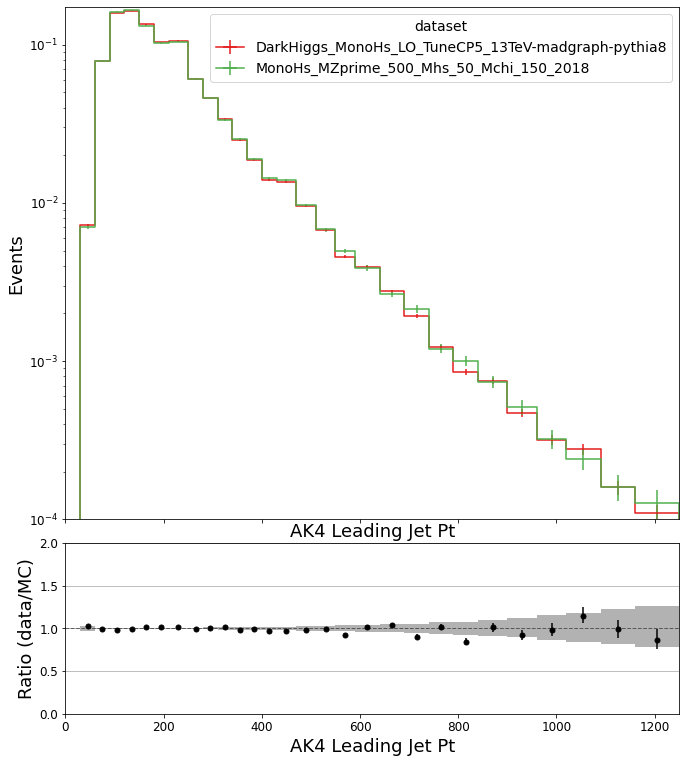

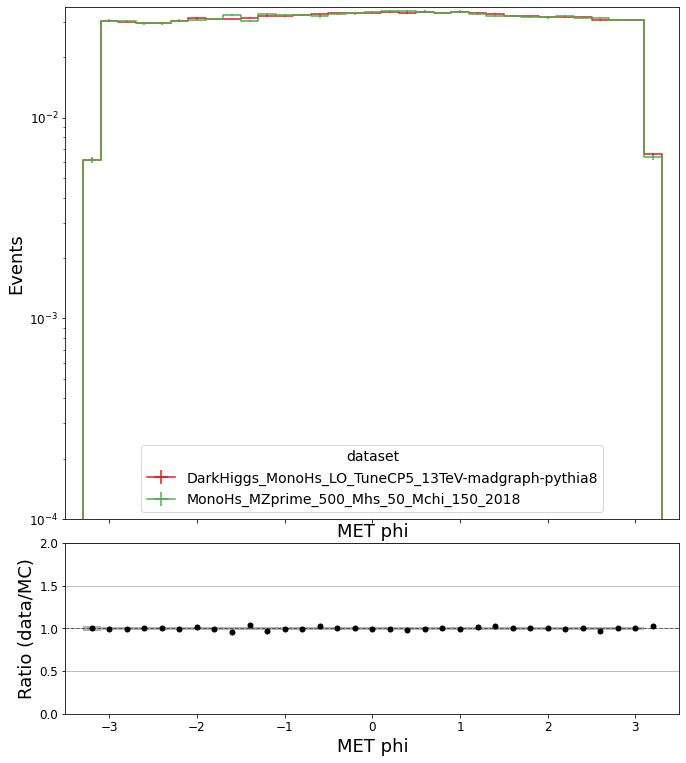

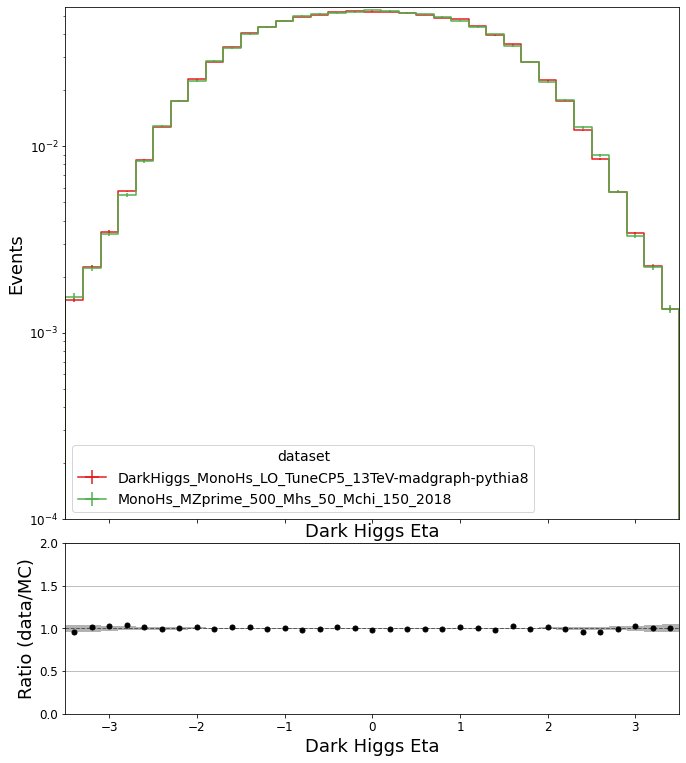

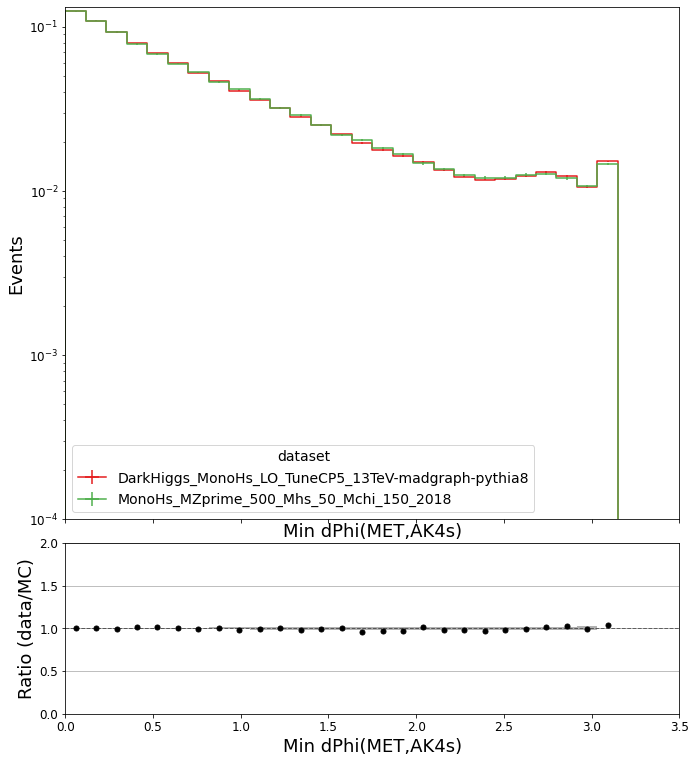

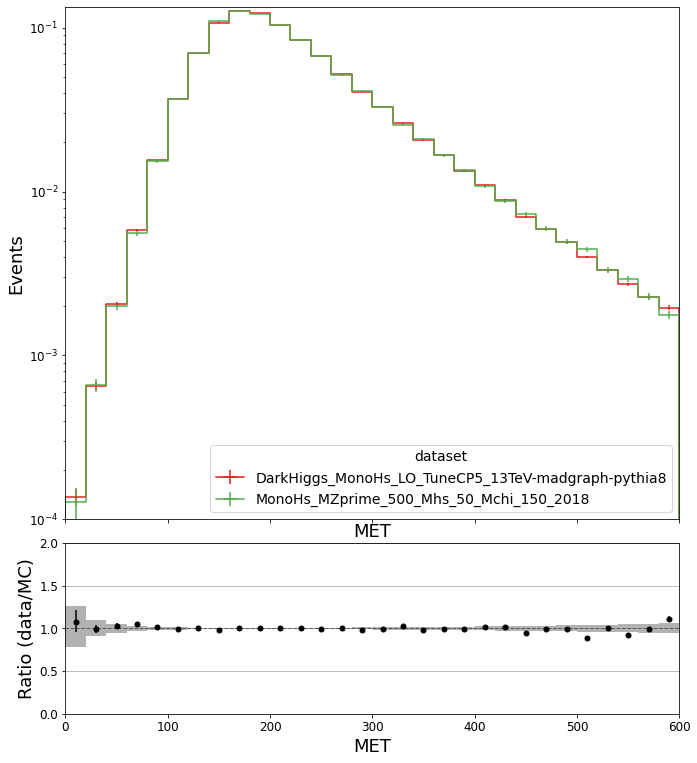

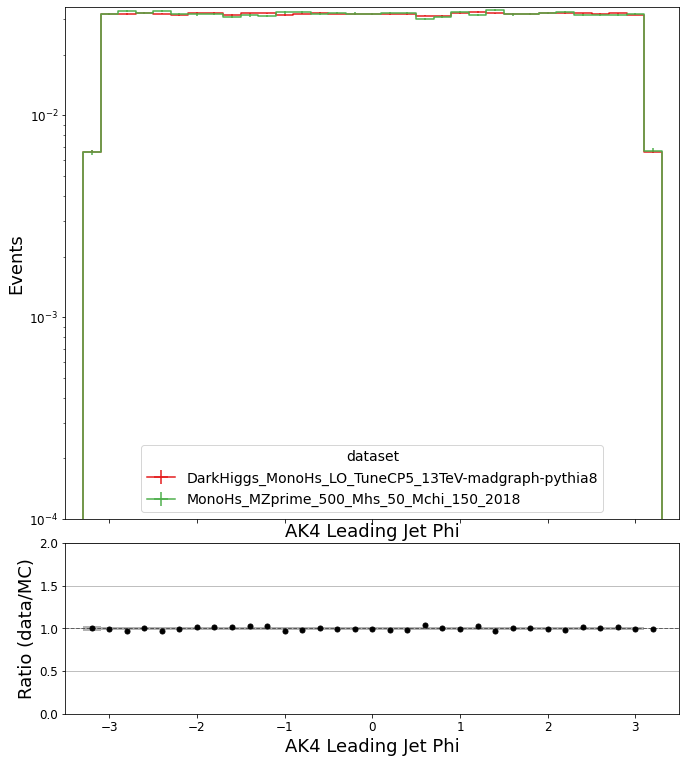

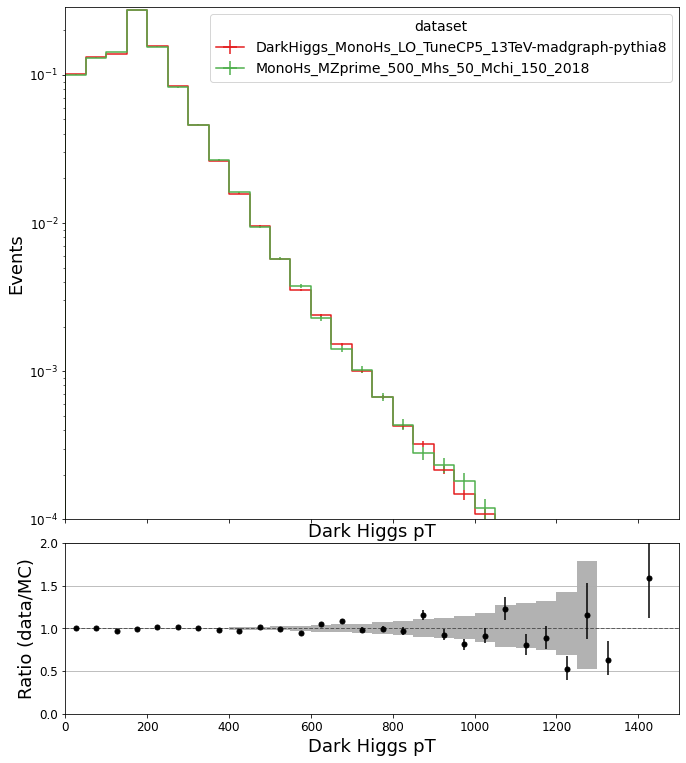

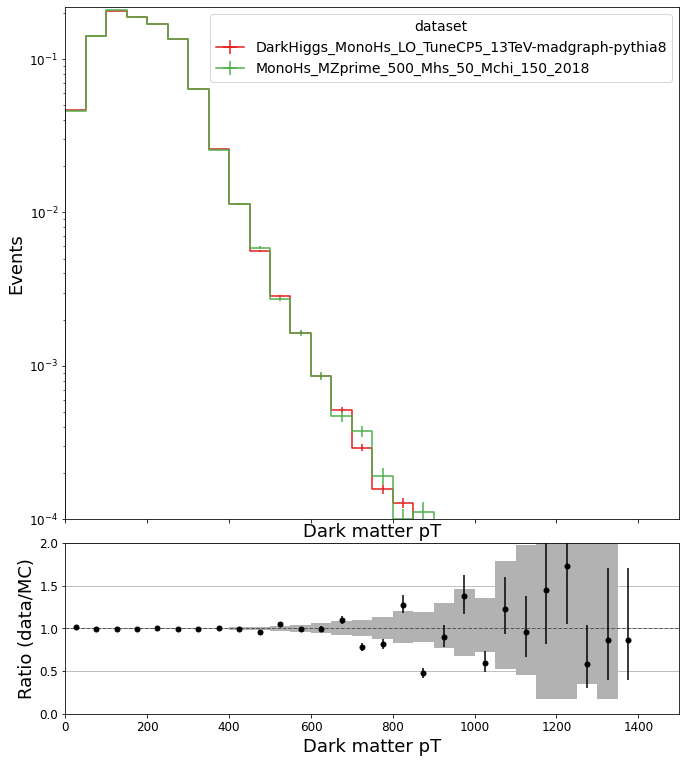

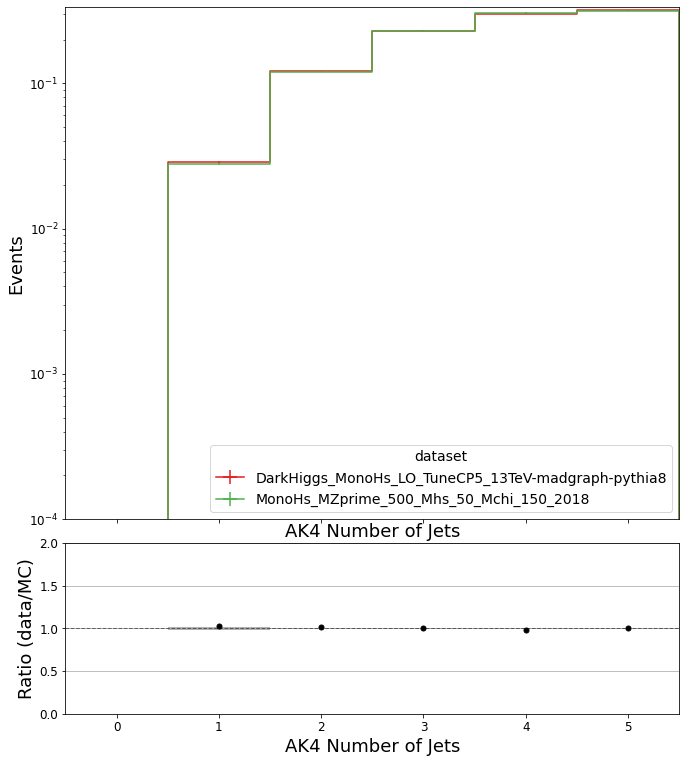

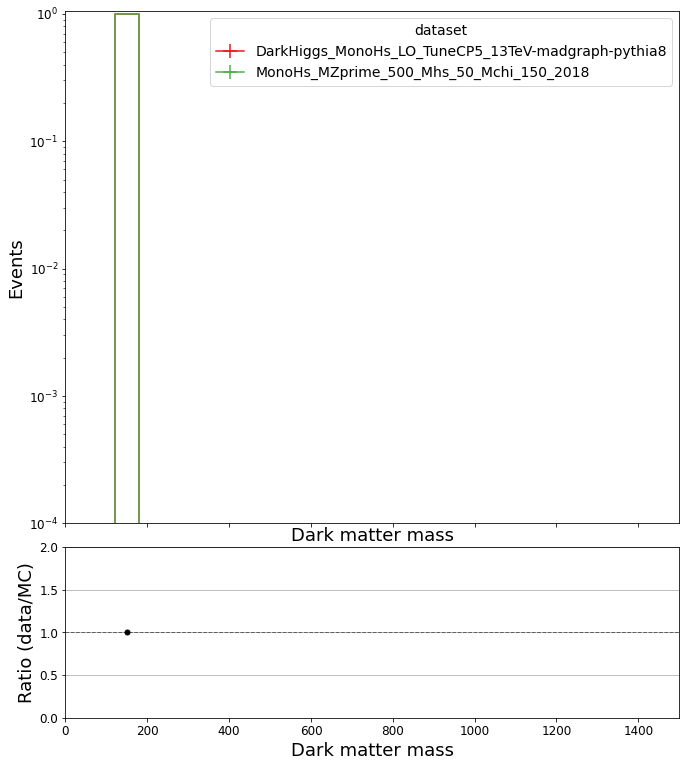

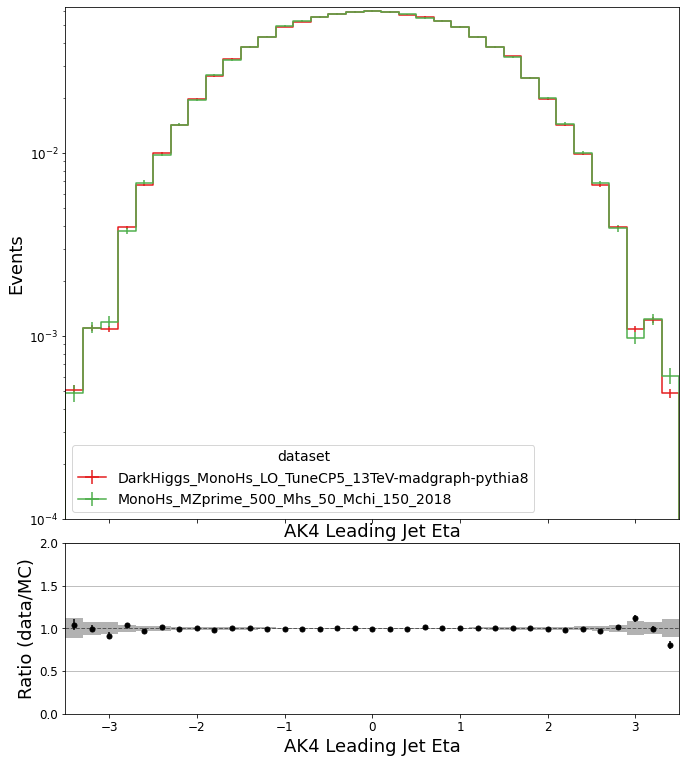

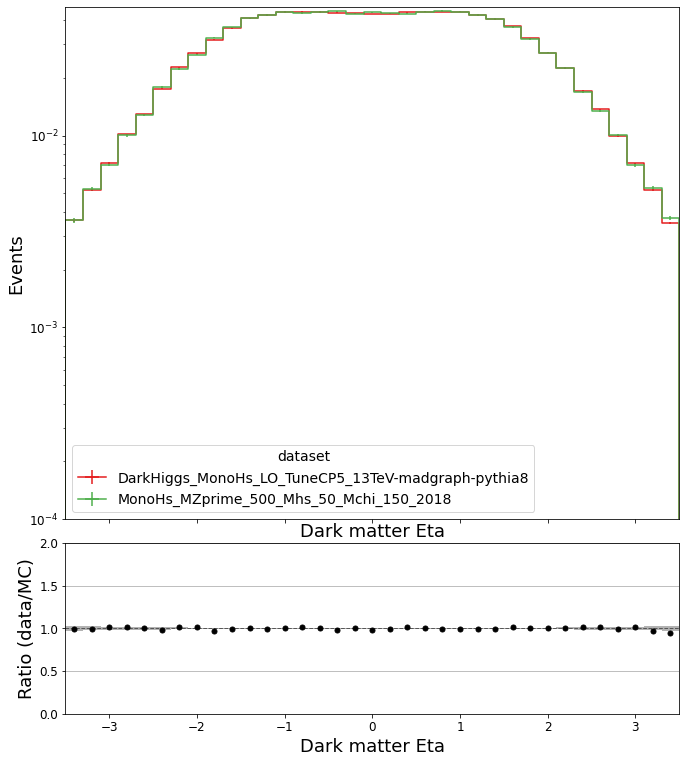

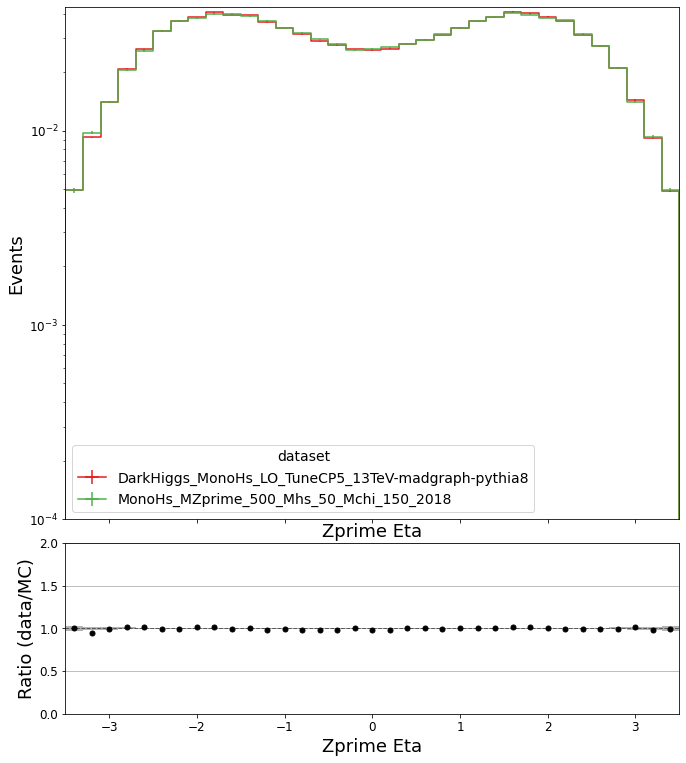

In [14]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

if not os.path.exists('plots'):
    os.makedirs('plots')

for key in off_hists.keys():
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#e41a1c', '#377eb8', '#4daf4a']


    fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
        
    plot.plot1d(off_hists[key], overlay="dataset", ax=ax, clear=False, stack=False,)
    plot.plot1d(pri_hists[key], overlay="dataset", ax=ax, clear=False, stack=False,)
    
    plot.plotratio(off_hists[key].integrate('dataset'), 
                   pri_hists[key].integrate('dataset'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
       

    rax.set_ylabel('Ratio (data/MC)')
    rax.set_ylim(0.0,2.0)
    rax.grid(axis='y')
        
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.0001, None)
    #leg = ax.legend(ncol=2, loc='best')
        
    #coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    #os.system('mkdir -p ../plots/darkhiggs'+year+'/'+str(j)+'/')
    #plot_path = os.path.abspath('../plots/darkhiggs'+year+'/'+str(j)+'/') 
    #plot_name = 'stack_'+key+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))

In [ ]:
        plot.plot1d(data_hists[key].integrate('region',j).sum('gentype')[data[year][str(j)]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('region',j).sum('gentype'),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('region',j).sum('gentype').integrate('process',data[year][str(j)]), 
                   bkg_hists[key].integrate('region',j).sum('gentype').sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )